# Cnoidal wave solutions to the Serre equations

# Description
According to Carter and Cienfuegos (2011), the Serre equations admit the following family of periodic solutions

\begin{align*}
    h(x,t) &= a_0 + a_1 dn^2(\kappa(x-ct),k) \\
    u(x,t) &= c\left( 1 - \frac{h_0}{h(x,t)}\right)
\end{align*}

\begin{align*}
    \kappa &= \frac{\sqrt{3a_1}}{2\sqrt{a_0(a_0+a_1)(a_0+(1-k^2)a_1)}} \\
    c &= \frac{\sqrt{g a_0(a_0+a_1)(a_0+(1-k^2)a_1)}}{h_0}
\end{align*}

with $k\in(0,1)$, $a_0>0$ and $a_1>0$, $dn(\cdot,k)$ is a Jacobi elliptic function with elliptic modulus $k$.

The relation between the wavelength $\lambda$ and $k\in(0,1)$ is $$\lambda = \frac{2K(k)}{\kappa}$$ and the mean water depth, $h_0$ is computed as $$h_0 = \frac{1}{\lambda}\int_{0}^\lambda h(x,t)dx = a_0 + a_1 \frac{E(k)}{K(k)}$$

with $K(k)$ and $E(k)$ are the complete elliptic integrals of the first and second kinds.

The limit for $k\to0^+$ is constant water level $a_0+a_1$ at rest. If $k\to1^-$ it converges to the Rayleight solitary wave solution.




## Limit case : Rayleigh solitary wave solutions

The cnoidal solution presented above limits, as $k \rightarrow 1^-$, to the two-parameter ($a_0$ and $a_1$) family of solitary wave solutions, known as the Rayleigh solitary wave solutions :

\begin{align*}
    h(x,t) &= a_0 + a_1 sech^2(\kappa(x-ct),k) \\
    u(x,t) &= c\left( 1 - \frac{a_0}{h(x,t)}\right)
\end{align*}

\begin{align*}
    \kappa &= \frac{\sqrt{3a_1}}{2\sqrt{a_0(a_0+a_1)}} \\
    c &= \sqrt{g a_0(a_0+a_1)}
\end{align*}

The expressions for the wavelength $\lambda$ and the mean water depth $h_0$ are the same as shown for the general case of the cnoidal solution.

## Implementation

In [1]:
import numpy as np
from scipy import special

Set $a_0$, $a_1$ and $k$

In [2]:
a0 = 0.3
a1 = 0.1
k = 0.99
g = 9.81

Get $\kappa$, $h_0$ and $c$

In [3]:
kappa = np.sqrt(3*a1)/(2*np.sqrt(a0*(a0+a1)*(a0+(1-k*k)*a1)))
h0 = a0+ a1*special.ellipe(k)/special.ellipk(k)
c = np.sqrt(g*a0*(a0+a1)*(a0+(1.-k*k)*a1))/h0

Make a discretization

$\lambda = 2K(k)/\kappa$

In [4]:
lam = 2.*special.ellipk(k)/kappa
print 'Wavelength = %.3f'%lam
print 'mean depth = %.3f'%h0

x = np.linspace(-lam,lam,200)
t = 0.0

Wavelength = 5.138
mean depth = 0.327


In [5]:
sn,cn,dn,ph = special.ellipj(kappa*(x-c*t),k)
h = a0+a1*dn**2
u = c*(1-h0/h)

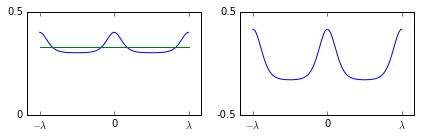

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,2))
plt.subplot(121)
plt.plot(x,h)
plt.plot(x,np.ones_like(x)*h0)
plt.ylim(0,0.5)
plt.xticks([-lam,0.0,lam],[r'$-\lambda$','0','$\lambda$'])
plt.yticks([0.0, 0.5],['0','0.5'])
plt.subplot(122)
plt.plot(x,u)
plt.ylim(-0.5,0.5)
plt.tight_layout()
plt.xticks([-lam,0.0,lam],[r'$-\lambda$','0','$\lambda$'])
plt.yticks([-0.5,0.5],('-0.5','0.5'));

## Write it to a file

In [7]:
%%writefile cnoidal.py

import numpy as np
from scipy import special

def WaveLengthDepth(k,a0,a1):
    """
        Returns the wavelength and mean depth
        of a cnoidal wave with parameters k,a0,a1
    """
    kappa = np.sqrt(3*a1)/(2*np.sqrt(a0*(a0+a1)*(a0+(1-k*k)*a1)))
    h0 = a0+ a1*special.ellipe(k)/special.ellipk(k)    
    lam = 2.*special.ellipk(k)/kappa
    return lam,h0

def analyticalSolution(x,t,k,a0,a1):
    """
        Returns the cnoidal solution with parameters k,a0,a1
        at (x,t) (possibly arrays)        
    """
    g = 9.81
    kappa = np.sqrt(3*a1)/(2*np.sqrt(a0*(a0+a1)*(a0+(1-k*k)*a1)))
    h0 = a0+ a1*special.ellipe(k)/special.ellipk(k)
    c = np.sqrt(g*a0*(a0+a1)*(a0+(1.-k*k)*a1))/h0
    
    sn,cn,dn,ph = special.ellipj(kappa*(x-c*t),k)
    h = a0+a1*dn**2
    u = c*(1-h0/h)
    
    return h,u

def analyticalSolutionSolitary(x,t,a0,a1):
    """
        Returns the cnoidal solution with parameters k,a0,a1
        at (x,t) (possibly arrays)        
    """
    k = 0
    g = 9.81
    kappa = np.sqrt(3*a1)/(2*np.sqrt(a0*(a0+a1)))
    h0 = a0+ a1*special.ellipe(k)/special.ellipk(k) 
    c = np.sqrt(g*a0*(a0+a1))
    h = a0+ a1*np.power(np.cosh(kappa*(x-c*t)),-2)
    u = c*(1-a0/h)
    
    return h,u

Overwriting cnoidal.py


## Cnoidal solution

In [8]:
%reset -f

In [9]:
import numpy as np
import cnoidal

In [10]:
a0 = 0.3
a1 = 0.1
k = 0.99
g = 9.81

In [11]:
lam, h0 = cnoidal.WaveLengthDepth(k,a0,a1)
x = np.linspace(-lam,lam,200)
t = 0.0

In [12]:
h,u = cnoidal.analyticalSolution(x,t,k,a0,a1)

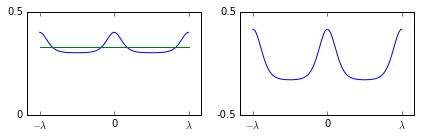

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,2))
plt.subplot(121)
plt.plot(x,h)
plt.plot(x,np.ones_like(x)*h0)
plt.ylim(0,0.5)
plt.xticks([-lam,0.0,lam],[r'$-\lambda$','0','$\lambda$'])
plt.yticks([0.0, 0.5],['0','0.5'])
plt.subplot(122)
plt.plot(x,u)
plt.ylim(-0.5,0.5)
plt.tight_layout()
plt.xticks([-lam,0.0,lam],[r'$-\lambda$','0','$\lambda$'])
plt.yticks([-0.5,0.5],('-0.5','0.5'));

## Rayleigh solitary wave solution

In [25]:
a0 = 0.3
a1 = 0.1
g = 9.81

In [26]:
lam, h0 = cnoidal.WaveLengthDepth(0,a0,a1)

x = np.linspace(-10.*lam,10.*lam,200)
t = 0.0
h,u = cnoidal.analyticalSolutionSolitary(x,t,a0,a1)

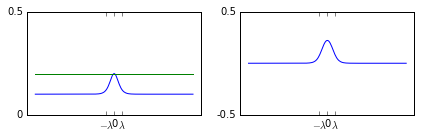

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,2))
plt.subplot(121)
plt.plot(x,h)
plt.plot(x,np.ones_like(x)*h0)
plt.ylim(0,0.5)
plt.xticks([-lam,0.0,lam],[r'$-\lambda$','0','$\lambda$'])
plt.yticks([0.0, 0.5],['0','0.5'])
plt.subplot(122)
plt.plot(x,u)
plt.ylim(-0.5,0.5)
plt.tight_layout()
plt.xticks([-lam,0.0,lam],[r'$-\lambda$','0','$\lambda$'])
plt.yticks([-0.5,0.5],('-0.5','0.5'));